4 g) 257


Analiza dla α = 2.5


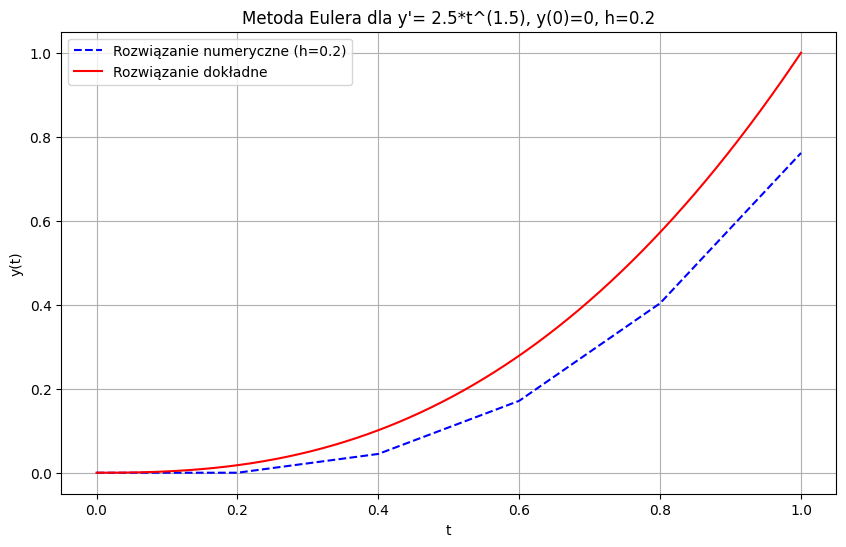

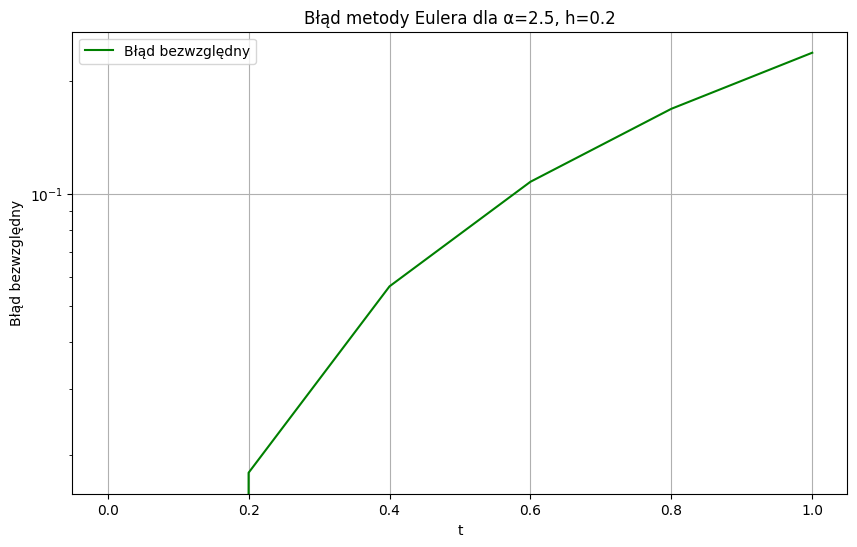

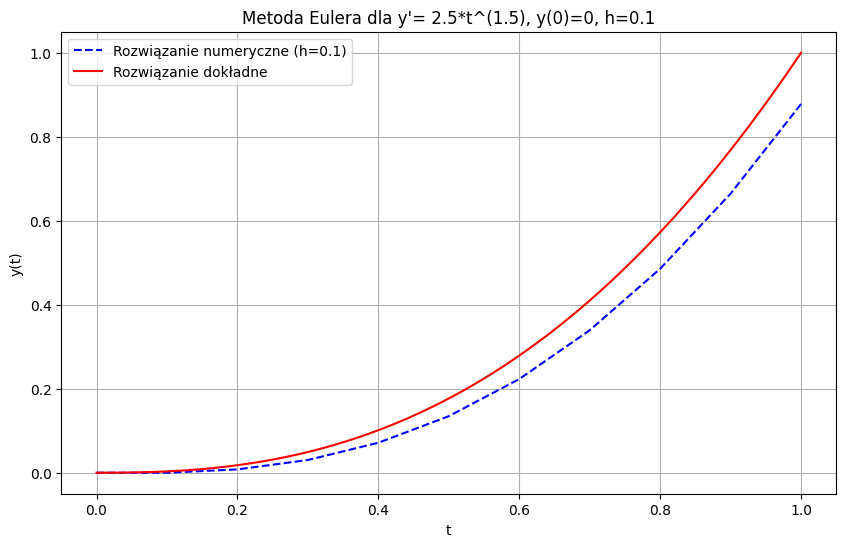

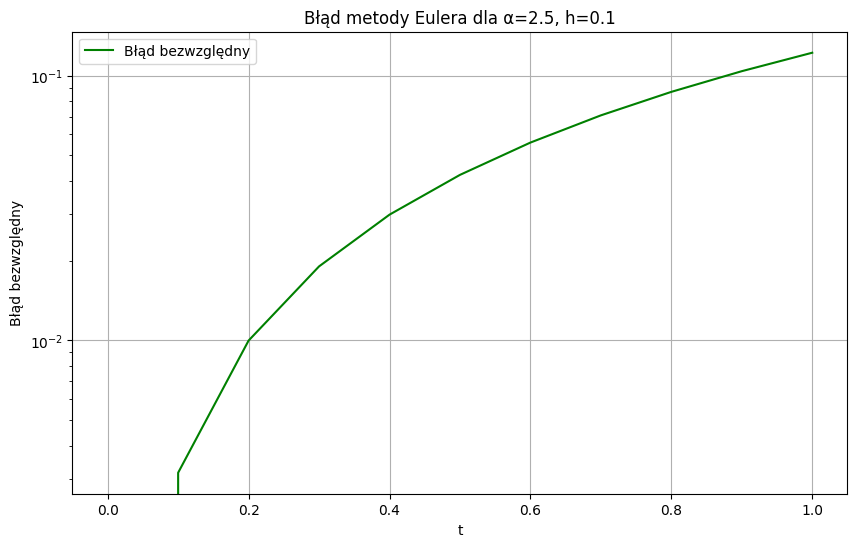

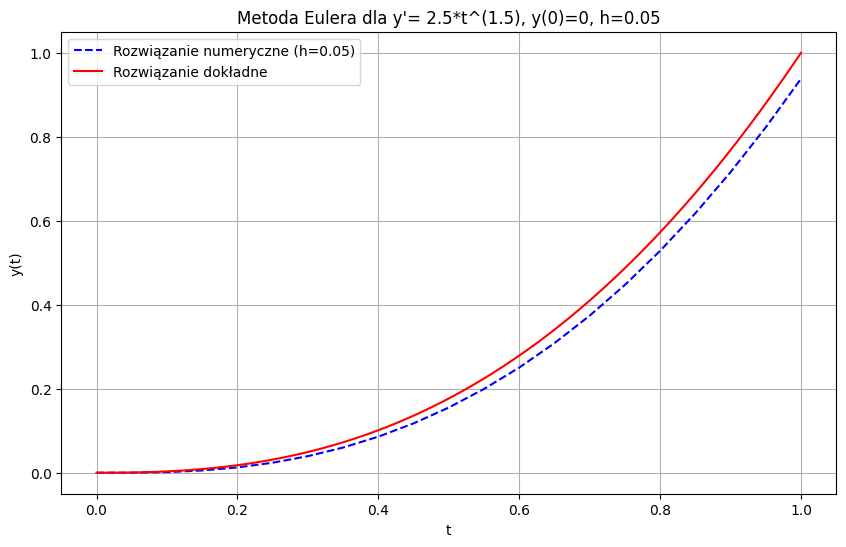

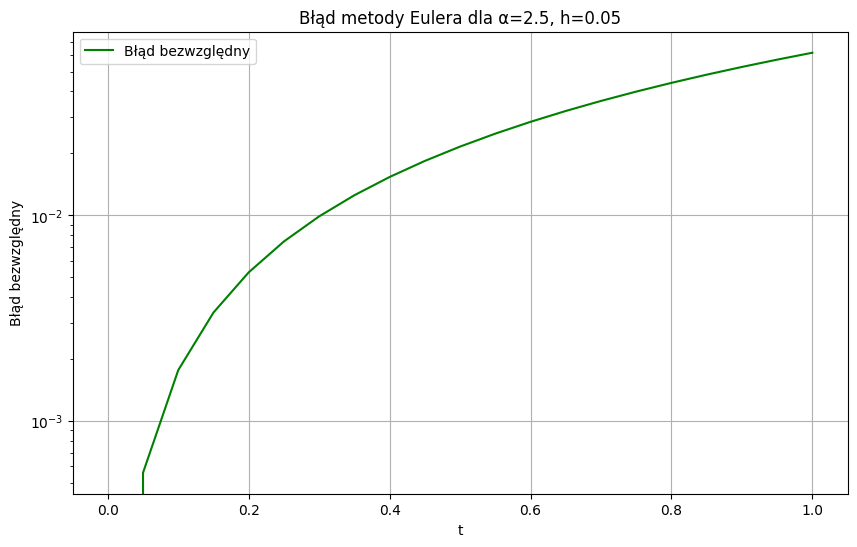

+----------+----------+----------+------------------+----------------+--------------------+---------------------+
|        α |        h |        t |   y (numeryczne) |   y (dokładne) |   Błąd bezwzględny |   Błąd względny [%] |
+==========+==========+==========+==================+================+====================+=====================+
| 2.500000 | 0.200000 | 0.000000 |         0.000000 |       0.000000 |           0.000000 |          nan        |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 2.500000 | 0.200000 | 0.200000 |         0.000000 |       0.017889 |           0.017889 |          100.000000 |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 2.500000 | 0.200000 | 0.600000 |         0.171212 |       0.278855 |           0.107642 |           38.601571 |
+----------+----------+----------+------------------+----------------+------------------

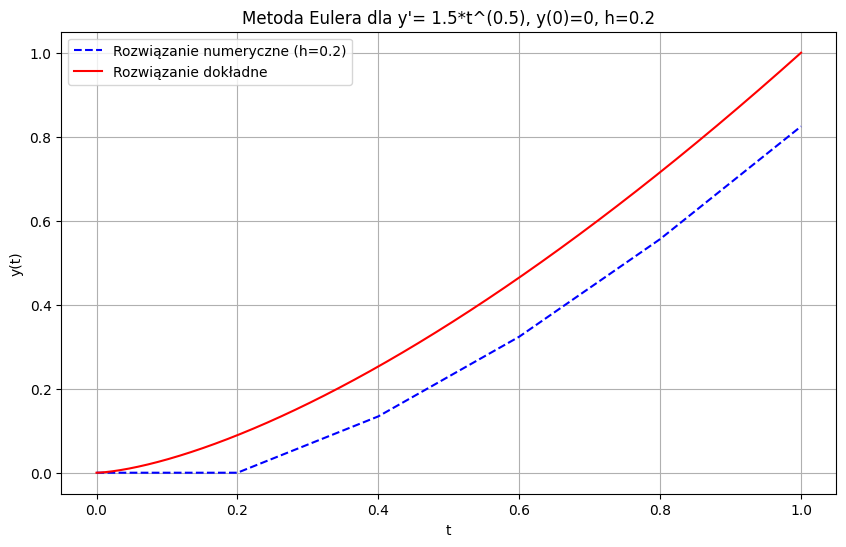

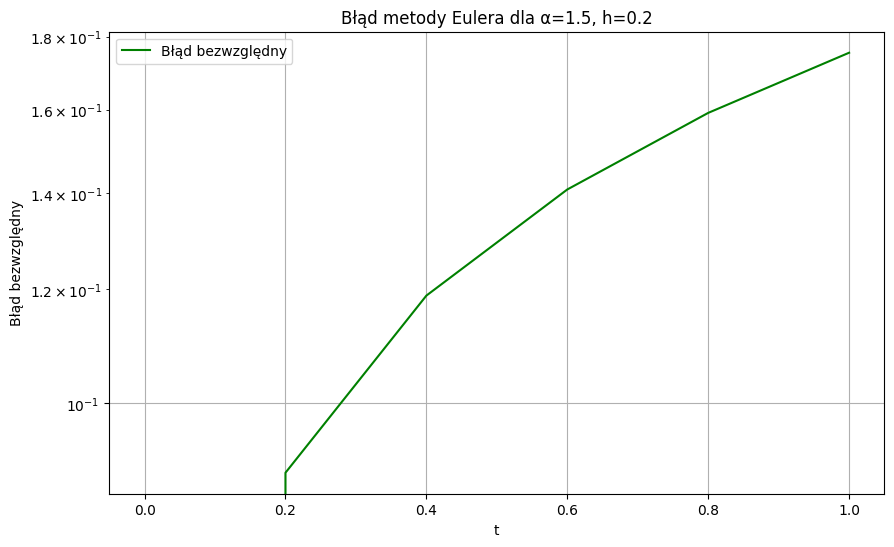

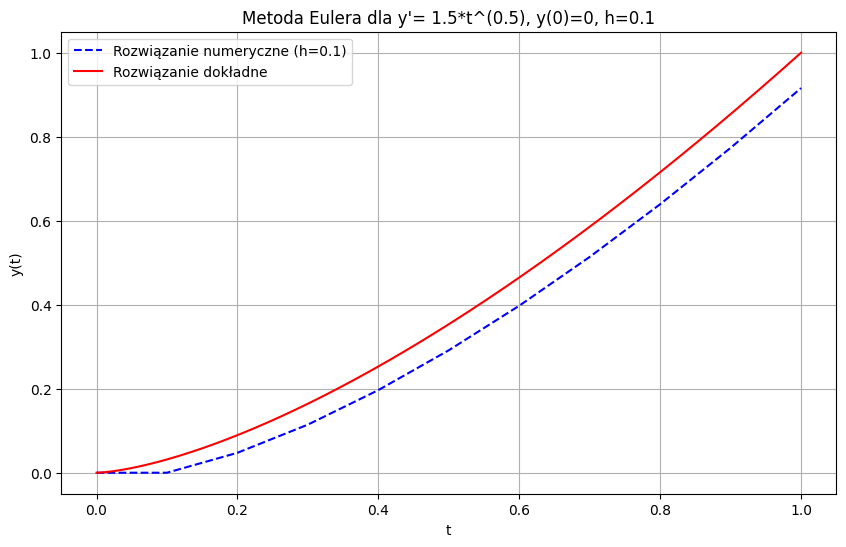

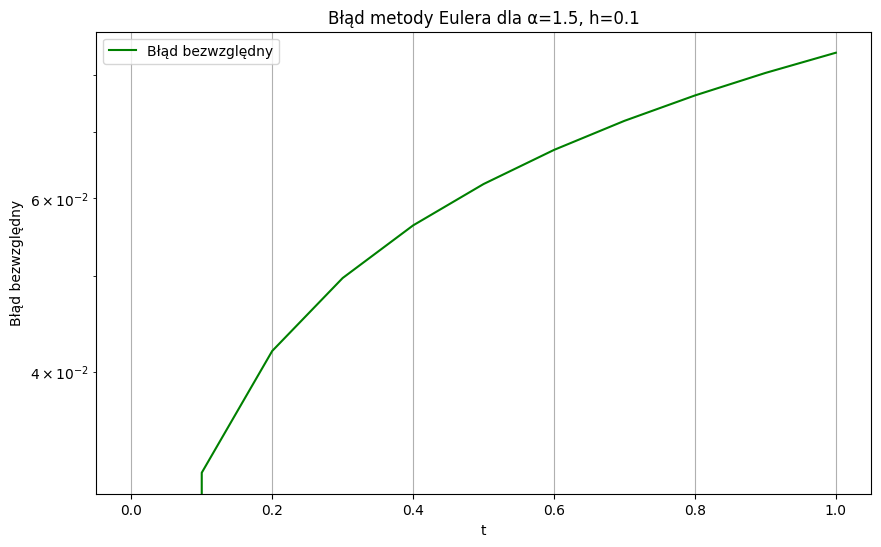

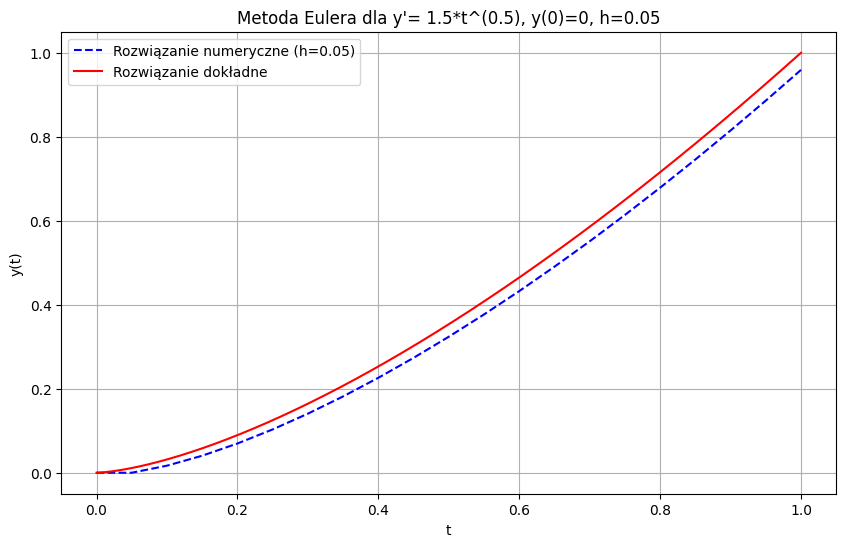

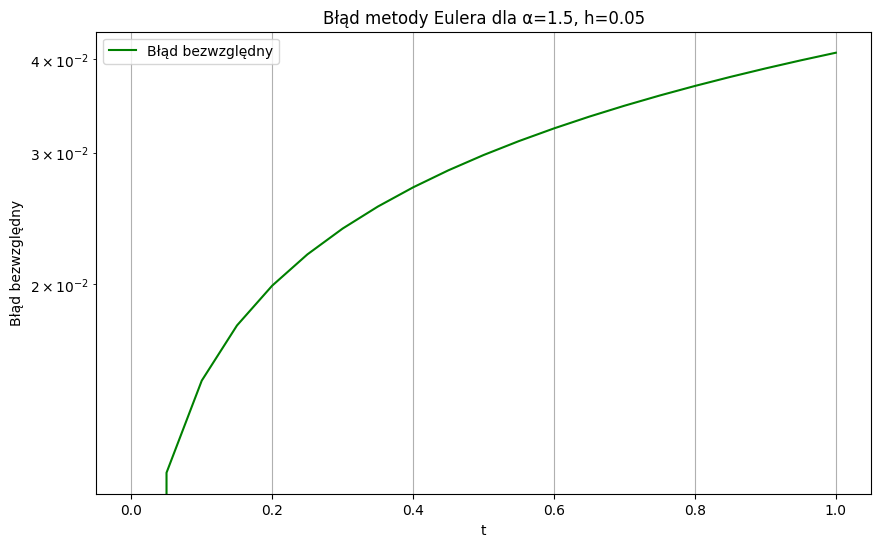

+----------+----------+----------+------------------+----------------+--------------------+---------------------+
|        α |        h |        t |   y (numeryczne) |   y (dokładne) |   Błąd bezwzględny |   Błąd względny [%] |
+==========+==========+==========+==================+================+====================+=====================+
| 1.500000 | 0.200000 | 0.000000 |         0.000000 |       0.000000 |           0.000000 |          nan        |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 1.500000 | 0.200000 | 0.200000 |         0.000000 |       0.089443 |           0.089443 |          100.000000 |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 1.500000 | 0.200000 | 0.600000 |         0.323901 |       0.464758 |           0.140857 |           30.307657 |
+----------+----------+----------+------------------+----------------+------------------

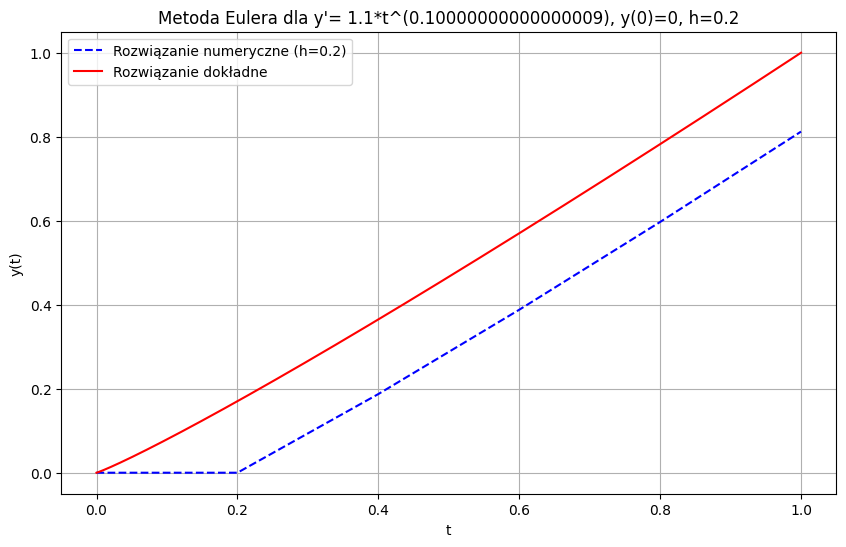

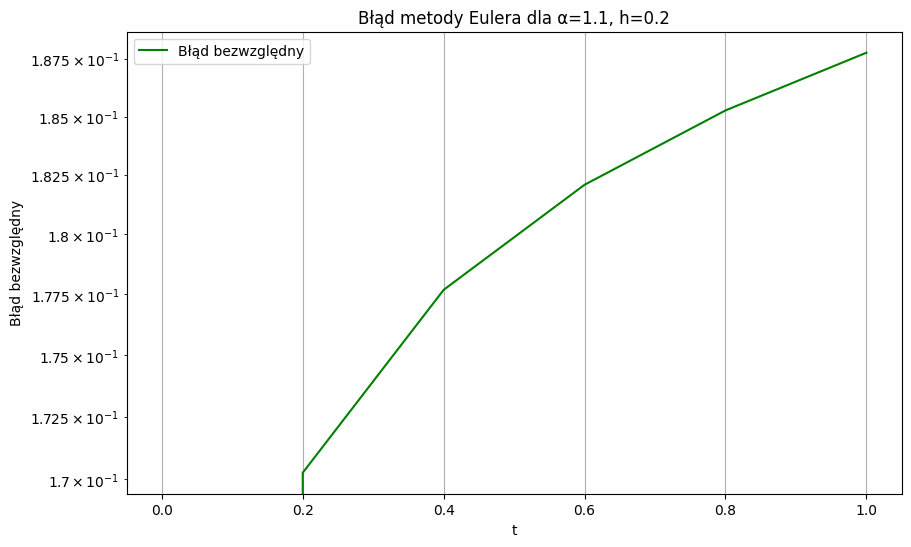

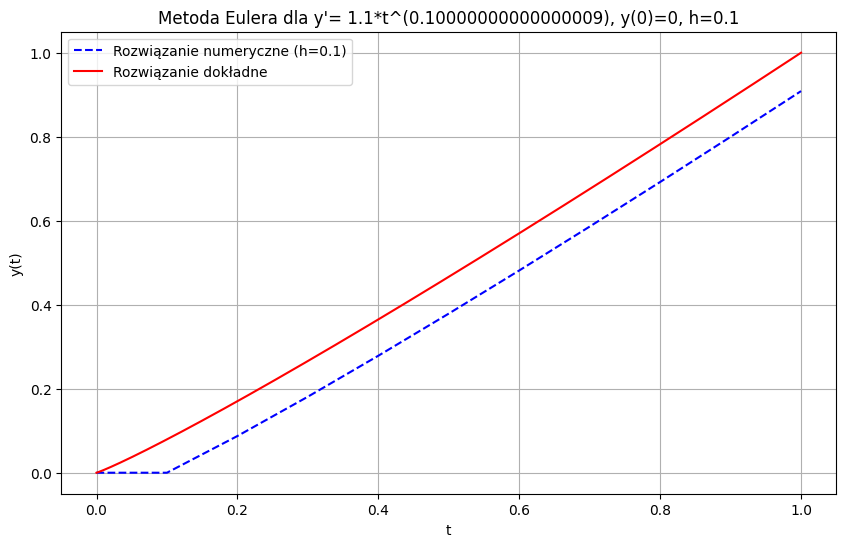

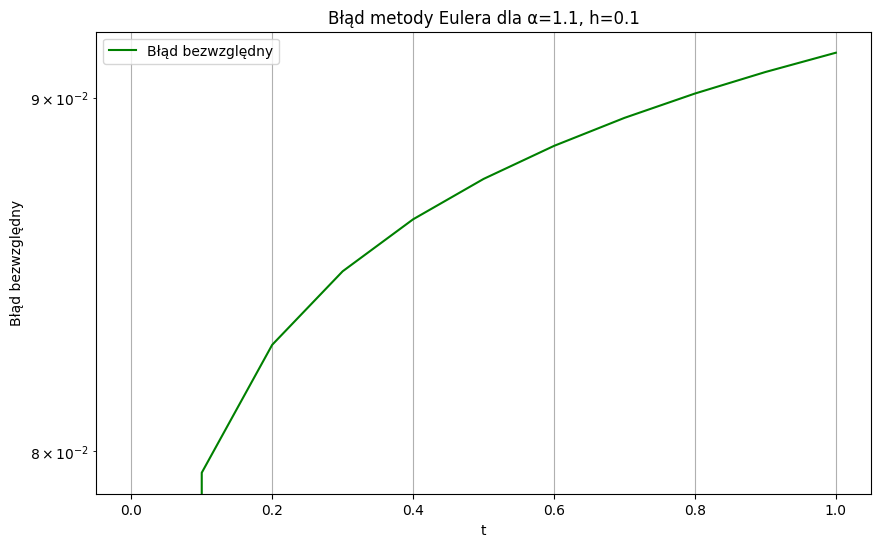

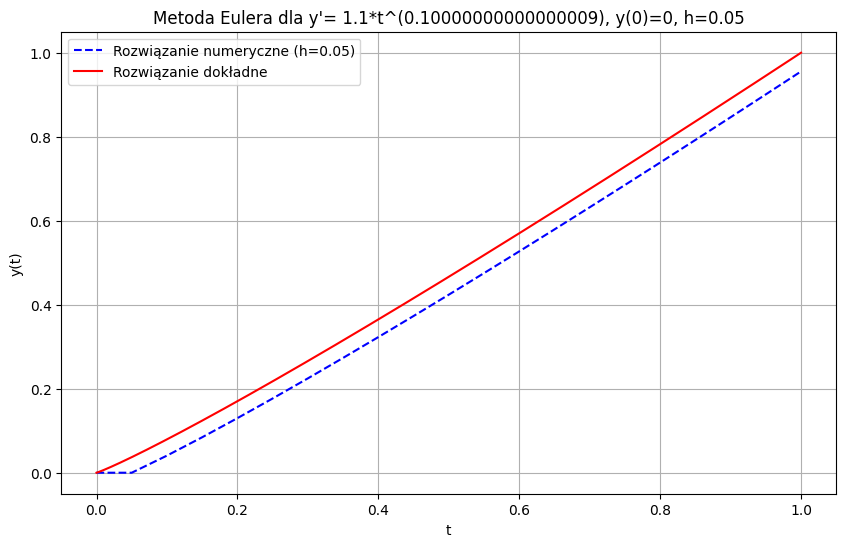

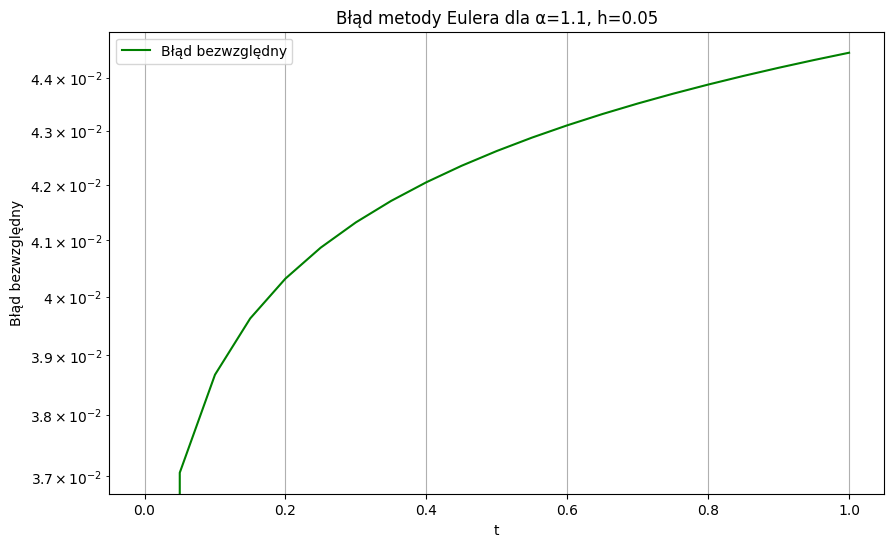

+----------+----------+----------+------------------+----------------+--------------------+---------------------+
|        α |        h |        t |   y (numeryczne) |   y (dokładne) |   Błąd bezwzględny |   Błąd względny [%] |
+==========+==========+==========+==================+================+====================+=====================+
| 1.100000 | 0.200000 | 0.000000 |         0.000000 |       0.000000 |           0.000000 |          nan        |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 1.100000 | 0.200000 | 0.200000 |         0.000000 |       0.170268 |           0.170268 |          100.000000 |
+----------+----------+----------+------------------+----------------+--------------------+---------------------+
| 1.100000 | 0.200000 | 0.600000 |         0.388032 |       0.570120 |           0.182088 |           31.938491 |
+----------+----------+----------+------------------+----------------+------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from math import log

def euler_method_check_4g(n_steps, t_end):
    h = t_end/n_steps
    
    t = 0.0
    y = 1.0
    
    for i in range(n_steps):
        y += h*(-5*y)
        t += h
    
    return y
    

def euler_method(alpha, h, t_end=1.0):
    """
    Rozwiązanie problemu początkowego y' = α*t^(α-1), y(0) = 0 metodą Eulera.
    
    Parametry:
    ----------
    alpha : float
        Parametr α w równaniu.
    h : float
        Krok metody Eulera.
    t_end : float, optional
        Koniec przedziału czasowego (domyślnie 1.0).
        
    Zwraca:
    -------
    t : ndarray
        Punkty siatki czasowej.
    y : ndarray
        Przybliżone rozwiązanie numeryczne.
    """
    n_steps = int(t_end / h)
    
    t = np.zeros(n_steps + 1)
    y = np.zeros(n_steps + 1)
    
    t[0] = 0.0
    y[0] = 0.0
    
    for i in range(n_steps):
        t[i+1] = t[i] + h
        if t[i] > 0:
            f = alpha * (t[i] ** (alpha - 1))
        else:
            f = 0
        y[i+1] = y[i] + h * f
    
    return t, y


def exact_solution(t, alpha):
    """
    Rozwiązanie dokładne y(t) = t^α.
    
    Parametry:
    ----------
    t : ndarray lub float
        Punkty czasowe.
    alpha : float
        Parametr α w równaniu.
        
    Zwraca:
    -------
    ndarray lub float
        Dokładne wartości rozwiązania.
    """
    return t ** alpha


def compute_errors(t, y_numerical, alpha):
    """
    Obliczenie błędów numerycznych.
    
    Parametry:
    ----------
    t : ndarray
        Punkty siatki czasowej.
    y_numerical : ndarray
        Przybliżone rozwiązanie numeryczne.
    alpha : float
        Parametr α w równaniu.
        
    Zwraca:
    -------
    absolute_errors : ndarray
        Błędy bezwzględne.
    relative_errors : ndarray
        Błędy względne.
    """
    y_exact = exact_solution(t, alpha)
    absolute_errors = np.abs(y_numerical - y_exact)
    
    relative_errors = np.zeros_like(absolute_errors)
    mask = y_exact != 0
    relative_errors[mask] = absolute_errors[mask] / np.abs(y_exact[mask])
    
    return absolute_errors, relative_errors


def compute_convergence_order(errors_h, errors_h_half):
    """
    Obliczenie empirycznego rzędu zbieżności.
    
    Parametry:
    ----------
    errors_h : float
        Błąd dla kroku h.
    errors_h_half : float
        Błąd dla kroku h/2.
        
    Zwraca:
    -------
    float
        Empiryczny rząd zbieżności.
    """
    return log(errors_h / errors_h_half) / log(2)


def main():
    alphas = [2.5, 1.5, 1.1]
    h_values = [0.2, 0.1, 0.05]
    t_end = 1.0
    
    for alpha in alphas:
        print(f"\n\n{'='*60}")
        print(f"Analiza dla α = {alpha}")
        print(f"{'='*60}")
        
        results = []
        max_errors = []
        
        for h in h_values:
            t, y = euler_method(alpha, h, t_end)
            
            abs_errors, rel_errors = compute_errors(t, y, alpha)
            
            indices = [0, len(t)//4, len(t)//2, 3*len(t)//4, -1]
            for idx in indices:
                results.append([
                    alpha,
                    h,
                    t[idx],
                    y[idx],
                    exact_solution(t[idx], alpha),
                    abs_errors[idx],
                    rel_errors[idx] * 100 if t[idx] > 0 else float('nan')
                ])
            
            max_errors.append(abs_errors[-1])
            
            plt.figure(figsize=(10, 6))
            plt.plot(t, y, 'b--', label=f'Rozwiązanie numeryczne (h={h})')
            
            t_exact = np.linspace(0, t_end, 1000)
            y_exact = exact_solution(t_exact, alpha)
            plt.plot(t_exact, y_exact, 'r-', label='Rozwiązanie dokładne')
            
            plt.title(f'Metoda Eulera dla y\'= {alpha}*t^({alpha-1}), y(0)=0, h={h}')
            plt.xlabel('t')
            plt.ylabel('y(t)')
            plt.grid(True)
            plt.legend()
            # plt.close()
            
            plt.figure(figsize=(10, 6))
            plt.semilogy(t, abs_errors, 'g-', label='Błąd bezwzględny')
            plt.title(f'Błąd metody Eulera dla α={alpha}, h={h}')
            plt.xlabel('t')
            plt.ylabel('Błąd bezwzględny')
            plt.grid(True)
            plt.legend()
            # plt.close()
        plt.show()
        
        headers = ["α", "h", "t", "y (numeryczne)", "y (dokładne)", "Błąd bezwzględny", "Błąd względny [%]"]
        print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".6f"))
        
        if len(max_errors) >= 3:
            p1 = compute_convergence_order(max_errors[0], max_errors[1])
            p2 = compute_convergence_order(max_errors[1], max_errors[2])
            
            print(f"\nEmpiryczny rząd zbieżności:")
            print(f"Dla h = {h_values[0]} i h = {h_values[1]}: p ≈ {p1:.4f}")
            print(f"Dla h = {h_values[1]} i h = {h_values[2]}: p ≈ {p2:.4f}")


if __name__ == "__main__":
    min_steps = None
    for i in range(1, int(1e9)):
        diff = abs(euler_method_check_4g(i, 0.5) - np.e**(-2.5))
        if diff < 0.001:
            min_steps = i
            break
    print("4 g)", min_steps)
    main()